# <b> Decision Tree Model 1 <b>

## <b> Decision Tree Model using using Age, Race, Sex, and Offense Types as Features <b>

Import Required Libraries

In [1812]:
# importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [1813]:
# reading dataset using pandas
data = pd.read_csv(r'iowa_rec_clean.csv')
# print data
data

,Fiscal _Year_Released,Recidivism_Reporting_Year,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype,Return_To_Prison,Recidivism_Type
0,2010.0000,2013.0000,2.0000,433.0000,4.0000,7.0000,2.0000,3.0000,4.0000,16.0000,4.0000,2.0000,23.0000,1.0000,0.0000
1,2010.0000,2013.0000,2.0000,453.0000,2.0000,11.0000,2.0000,4.0000,2.0000,21.0000,0.0000,0.0000,0.0000,1.0000,2.0000
2,2010.0000,2013.0000,3.0000,832.0000,4.0000,11.0000,2.0000,2.0000,0.0000,23.0000,0.0000,0.0000,0.0000,1.0000,2.0000
3,2010.0000,2013.0000,2.0000,0.0000,4.0000,11.0000,2.0000,2.0000,1.0000,11.0000,0.0000,0.0000,0.0000,0.0000,1.0000
4,2010.0000,2013.0000,3.0000,116.0000,2.0000,7.0000,2.0000,4.0000,4.0000,3.0000,0.0000,0.0000,0.0000,1.0000,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015.0000,2018.0000,1.0000,0.0000,6.0000,10.0000,2.0000,3.0000,4.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000
26016,2015.0000,2018.0000,3.0000,0.0000,11.0000,11.0000,2.0000,3.0000,4.0000,17.0000,0.0000,0.0000,0.0000,0.0000,1.0000
26017,2015.0000,2018.0000,2.0000,0.0000,5.0000,11.0000,1.0000,1.0000,3.0000,22.0000,0.0000,0.0000,0.0000,0.0000,1.0000
26018,2015.0000,2018.0000,2.0000,0.0000,10.0000,11.0000,2.0000,4.0000,2.0000,21.0000,0.0000,0.0000,0.0000,0.0000,1.0000


Remove Null from Dataset

In [1814]:
# checking for null values
data.isnull()

,Fiscal _Year_Released,Recidivism_Reporting_Year,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype,Return_To_Prison,Recidivism_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26016,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26017,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26018,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1815]:
# checking for nan
data.isnull().any()

Fiscal _Year_Released         False
Recidivism_Reporting_Year     False
Age_At_Release                False
Days_To_Return                False
Release_Type                  False
Race_Ethnicity                False
Sex                           False
Offense_Classification        False
Offense_Type                  False
Offense_Subtype               False
New_Offense_Classification    False
New_Offense_Type              False
New_Offense_Subtype           False
Return_To_Prison              False
Recidivism_Type               False
dtype: bool

In [1816]:
# count null values in each column
data.isnull().sum()

Fiscal _Year_Released         0
Recidivism_Reporting_Year     0
Age_At_Release                0
Days_To_Return                0
Release_Type                  0
Race_Ethnicity                0
Sex                           0
Offense_Classification        0
Offense_Type                  0
Offense_Subtype               0
New_Offense_Classification    0
New_Offense_Type              0
New_Offense_Subtype           0
Return_To_Prison              0
Recidivism_Type               0
dtype: int64

Remove Unnecessary Columns

In [1817]:
# remove Fiscal_Year_Released and Recidivism Reporting Year columns
data.drop(['Recidivism_Reporting_Year'], axis=1, inplace=True)

Estimate Correlation Coefficients

In [1818]:
# assesses relationships between variables
pd.options.display.float_format = '{:.4f}'.format
corr_matrix = data.corr()
corr_matrix

,Fiscal _Year_Released,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype,Return_To_Prison,Recidivism_Type
Fiscal _Year_Released,1.0000,0.0096,0.0401,0.0991,0.0082,-0.0289,0.0250,-0.0240,-0.0202,0.1296,0.1112,0.1496,0.0580,-0.0054
Age_At_Release,0.0096,1.0000,-0.0678,0.0150,0.0489,-0.0202,0.0329,-0.0149,0.0137,-0.0673,-0.0766,-0.0656,-0.0893,0.0212
Days_To_Return,0.0401,-0.0678,1.0000,0.0429,-0.0060,0.0325,0.0011,-0.0617,0.0197,0.6413,0.6494,0.6226,0.8054,-0.3433
Release_Type,0.0991,0.0150,0.0429,1.0000,0.0547,-0.0394,0.0595,-0.0773,0.1322,0.0296,-0.0129,0.0264,0.1218,0.1218
Race_Ethnicity,0.0082,0.0489,-0.0060,0.0547,1.0000,-0.0214,0.0035,-0.0255,0.0060,0.0023,-0.0230,0.0060,0.0061,0.0132
Sex,-0.0289,-0.0202,0.0325,-0.0394,-0.0214,1.0000,0.0289,0.0606,-0.0228,0.0324,0.0433,0.0152,0.0338,-0.0465
Offense_Classification,0.0250,0.0329,0.0011,0.0595,0.0035,0.0289,1.0000,-0.1108,0.0182,0.0572,-0.0185,0.0031,0.0132,0.0377
Offense_Type,-0.0240,-0.0149,-0.0617,-0.0773,-0.0255,0.0606,-0.1108,1.0000,-0.5008,-0.0775,0.0711,-0.1107,-0.0780,-0.0314
Offense_Subtype,-0.0202,0.0137,0.0197,0.1322,0.0060,-0.0228,0.0182,-0.5008,1.0000,0.0065,-0.0859,0.1071,0.0195,0.0554
New_Offense_Classification,0.1296,-0.0673,0.6413,0.0296,0.0023,0.0324,0.0572,-0.0775,0.0065,1.0000,0.7364,0.7072,0.7272,-0.4982


In [1819]:
# shows the relationship of all variables to Age_At_Release, where the top variables have strong correlation
corr_matrix['Age_At_Release'].sort_values(ascending=False)

Age_At_Release                1.0000
Race_Ethnicity                0.0489
Offense_Classification        0.0329
Recidivism_Type               0.0212
Release_Type                  0.0150
Offense_Subtype               0.0137
Fiscal _Year_Released         0.0096
Offense_Type                 -0.0149
Sex                          -0.0202
New_Offense_Subtype          -0.0656
New_Offense_Classification   -0.0673
Days_To_Return               -0.0678
New_Offense_Type             -0.0766
Return_To_Prison             -0.0893
Name: Age_At_Release, dtype: float64

In [1820]:
# shows the relationship of all variables to Sex, where the top variables have strong correlation
corr_matrix['Sex'].sort_values(ascending=False)

Sex                           1.0000
Offense_Type                  0.0606
New_Offense_Type              0.0433
Return_To_Prison              0.0338
Days_To_Return                0.0325
New_Offense_Classification    0.0324
Offense_Classification        0.0289
New_Offense_Subtype           0.0152
Age_At_Release               -0.0202
Race_Ethnicity               -0.0214
Offense_Subtype              -0.0228
Fiscal _Year_Released        -0.0289
Release_Type                 -0.0394
Recidivism_Type              -0.0465
Name: Sex, dtype: float64

In [1821]:
# shows the relationship of all variables to Race_Ethnicity, where the top variables have strong correlation
corr_matrix['Race_Ethnicity'].sort_values(ascending=False)

Race_Ethnicity                1.0000
Release_Type                  0.0547
Age_At_Release                0.0489
Recidivism_Type               0.0132
Fiscal _Year_Released         0.0082
Return_To_Prison              0.0061
Offense_Subtype               0.0060
New_Offense_Subtype           0.0060
Offense_Classification        0.0035
New_Offense_Classification    0.0023
Days_To_Return               -0.0060
Sex                          -0.0214
New_Offense_Type             -0.0230
Offense_Type                 -0.0255
Name: Race_Ethnicity, dtype: float64

In [1822]:
# shows the relationship of all variables to Days_To_Return, where the top variables have strong correlation
corr_matrix['Days_To_Return'].sort_values(ascending=False)

Days_To_Return                1.0000
Return_To_Prison              0.8054
New_Offense_Type              0.6494
New_Offense_Classification    0.6413
New_Offense_Subtype           0.6226
Release_Type                  0.0429
Fiscal _Year_Released         0.0401
Sex                           0.0325
Offense_Subtype               0.0197
Offense_Classification        0.0011
Race_Ethnicity               -0.0060
Offense_Type                 -0.0617
Age_At_Release               -0.0678
Recidivism_Type              -0.3433
Name: Days_To_Return, dtype: float64

In [1823]:
# shows the relationship of all variables to Return_To_Prison, where the top variables have strong correlation
corr_matrix['Return_To_Prison'].sort_values(ascending=False)

Return_To_Prison              1.0000
Days_To_Return                0.8054
New_Offense_Classification    0.7272
New_Offense_Type              0.7239
New_Offense_Subtype           0.6925
Release_Type                  0.1218
Fiscal _Year_Released         0.0580
Sex                           0.0338
Offense_Subtype               0.0195
Offense_Classification        0.0132
Race_Ethnicity                0.0061
Offense_Type                 -0.0780
Age_At_Release               -0.0893
Recidivism_Type              -0.2238
Name: Return_To_Prison, dtype: float64

Feature Selection

In [1824]:
# print all columns
data.columns

Index(['Fiscal _Year_Released', 'Age_At_Release', 'Days_To_Return',
       'Release_Type', 'Race_Ethnicity', 'Sex', 'Offense_Classification',
       'Offense_Type', 'Offense_Subtype', 'New_Offense_Classification',
       'New_Offense_Type', 'New_Offense_Subtype', 'Return_To_Prison',
       'Recidivism_Type'],
      dtype='object')

In [1825]:
# model1 independent variables
x_feature_cols_model1 = ['Age_At_Release', 'Race_Ethnicity', 'Sex', 'Release_Type',
                         'Offense_Classification', 'Offense_Type', 'Offense_Subtype', 
                         'New_Offense_Classification', 'New_Offense_Type', 'New_Offense_Subtype']
# model1 dependent variable
y_feature_cols_model1 = ['Return_To_Prison']

# convert variables to float
x1 = data[x_feature_cols_model1].astype(float)
y1 = data[y_feature_cols_model1].astype(float)

Splitting the Dataset

In [1826]:
# split dataset to 20% test and 80% train in a random state
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=5)

In [1827]:
# print split dataset shapes
print("x_train : ",x_train1.shape)
print("x_test : ",x_test1.shape)
print("y_train : ",y_train1.shape)
print("y_test : ",y_test1.shape)

x_train :  (20816, 10)
x_test :  (5204, 10)
y_train :  (20816, 1)
y_test :  (5204, 1)


In [1828]:
# export x training set to csv
# x_train.to_csv('x_training_data.csv', index=False)
# y_train.to_csv('y_training_data.csv', index=False)

Building the Decision Tree Model

In [1829]:
# decision tree parameters
model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, random_state=5)
# train algorithm on training data
model1 = model1.fit(x_train1, y_train1)
# predict response
y_pred1 = model1.predict(x_test1)

Model Evaluation

In [1830]:
# flatten array
y_test1 = y_test1.values.ravel()

In [1831]:
# print accuracy score
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9281322059953881


## Visualizing Decision Tree for Model 1

In [1832]:
# required libraries for visualization
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus

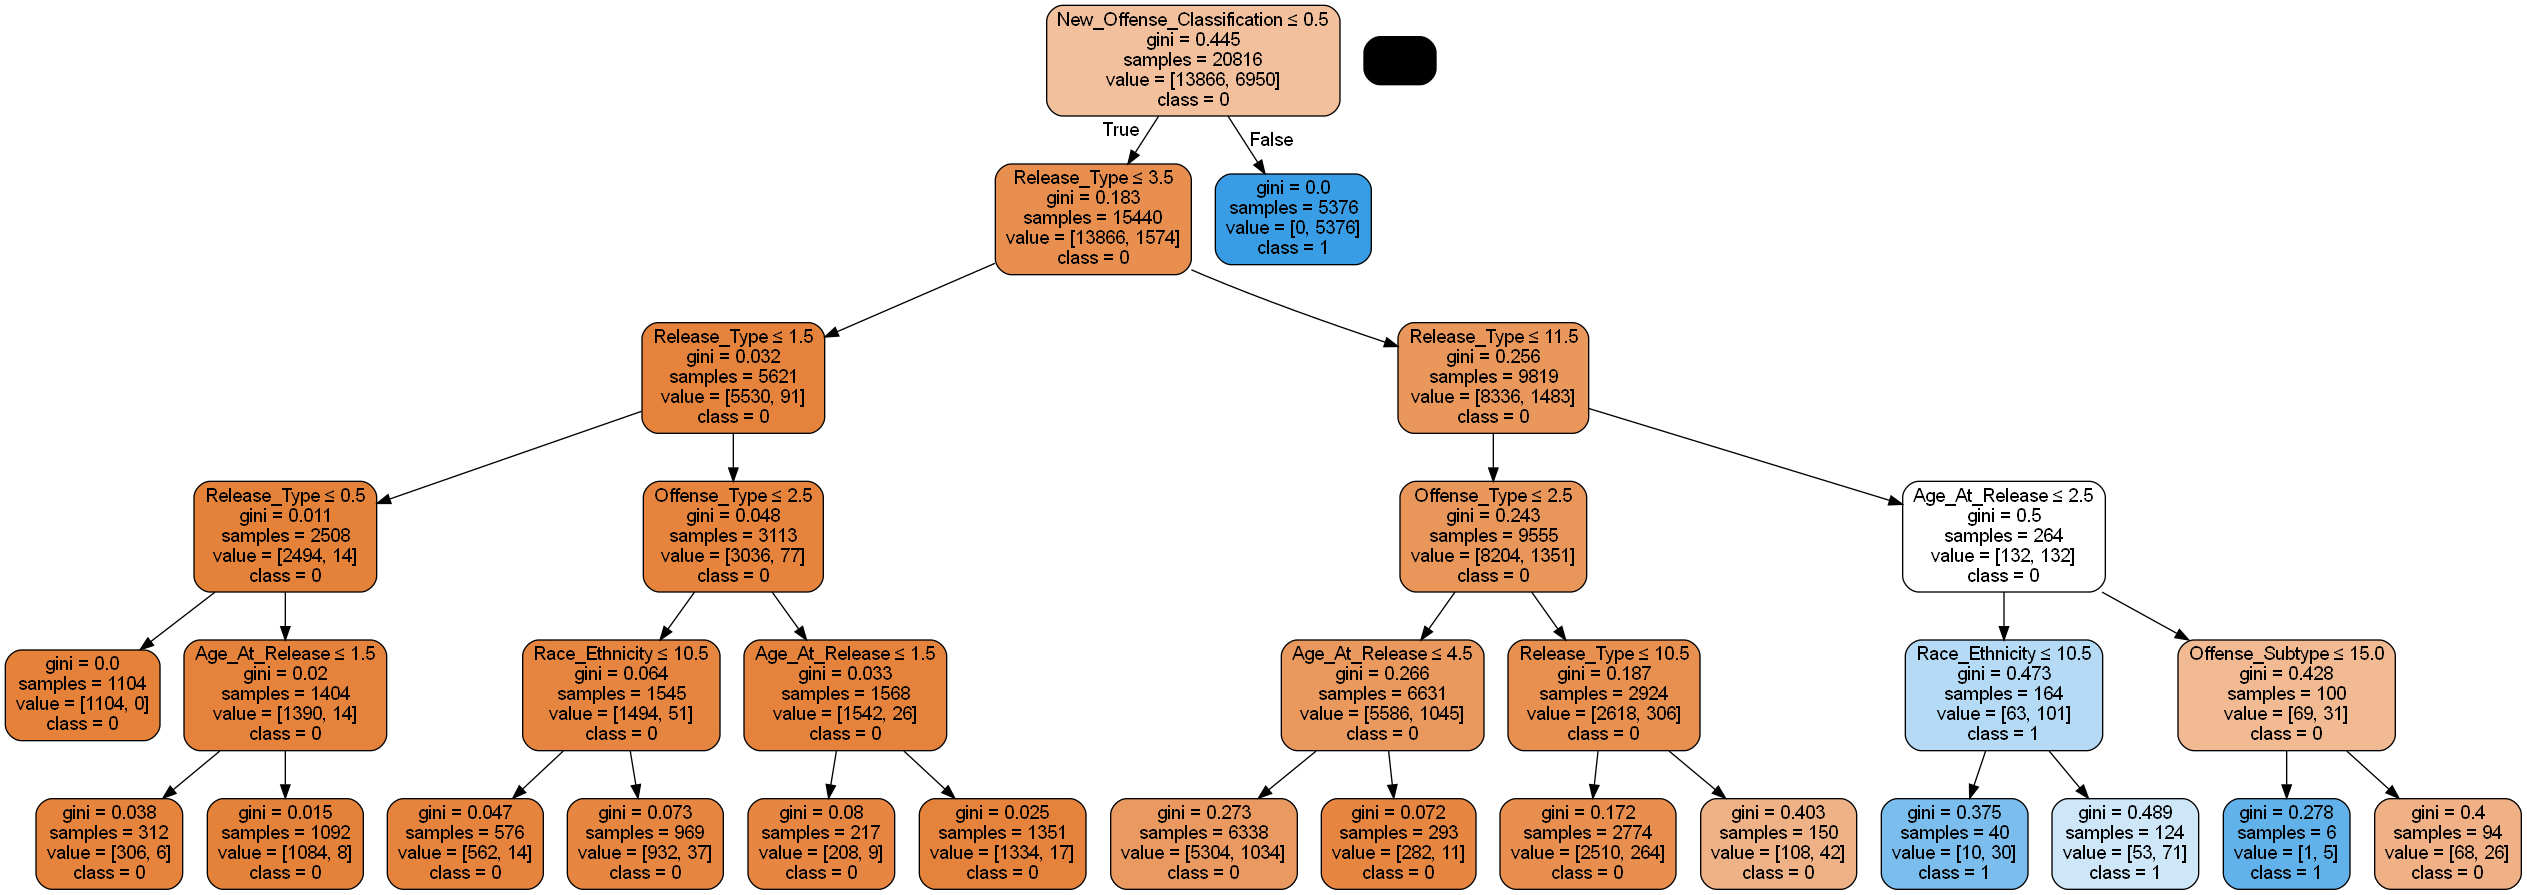

In [1833]:
# convert decision tree classifier into dot file
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_model1, class_names=['0', '1'])
# pydotplus converts dot file to png
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model1.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [1834]:
# create DT classifier object
model1 = DecisionTreeClassifier(criterion="gini", splitter='best',max_depth=4, random_state=0)
# DT classifier
model1 = model1.fit(x_train1,y_train1)
# predict the response
y_pred1 = model1.predict(x_test1)
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9279400461183704


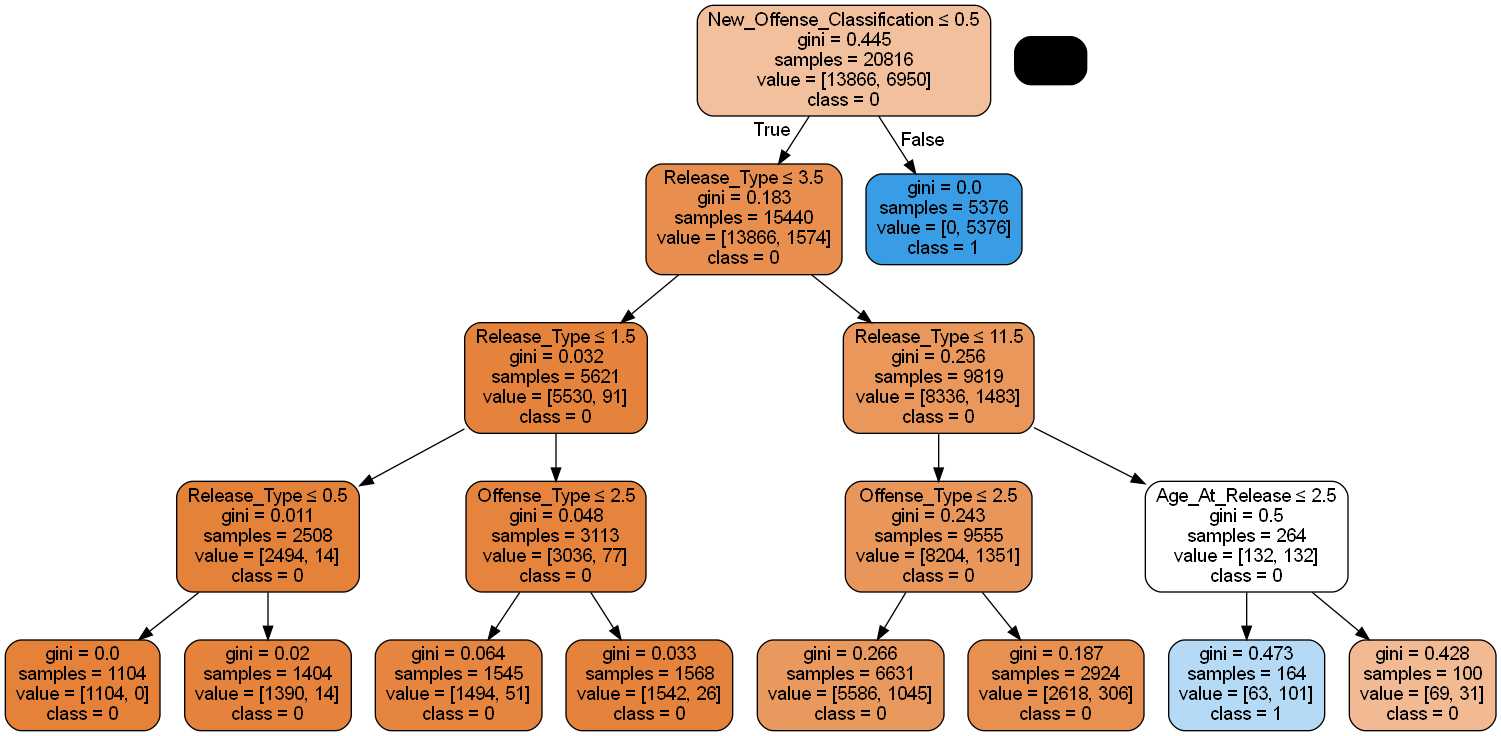

In [1835]:
# convert decision tree classifier into dot file
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_model1, class_names=['0', '1'])
# pydotplus converts dot file to png
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model1_2.png')
Image(graph.create_png())

## Testing

Root Mean Square Error

In [1836]:
# a low rmse value means that model can relatively predict data accurately 
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error(y_test1, y_pred1)
# print rmse
rmse1

0.07205995388162952

R-squared

In [1837]:
# R2 scores values
from sklearn.metrics import r2_score
print("R2 Score Value: {:.2f}".format(r2_score(y_test1, y_pred1)))

R2 Score Value: 0.68


Overfitting vs Underfitting

In [1838]:
print("Training set score: {:.4f}".format(model1.score(x_train1, y_train1)))

Training set score: 0.9262


In [1839]:
print("Test set score: {:.4f}".format(model1.score(x_test1, y_test1)))

Test set score: 0.9279


Metrics Analysis

In [1840]:
# required libraries for metrics analysis
from sklearn.metrics import confusion_matrix
# getting predicted classes for test
y_pred1 = model1.predict(x_test1)

In [1841]:
# calculate confusion matrix
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
conf_matrix1

array([[3460,   13],
       [ 362, 1369]], dtype=int64)

In [1842]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test1, y_pred1)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3473
         1.0       0.99      0.79      0.88      1731

    accuracy                           0.93      5204
   macro avg       0.95      0.89      0.91      5204
weighted avg       0.93      0.93      0.93      5204



# <b> Decision Tree Model 2 <b>

### <b> Decision Tree Model using using Age, Sex, and Offense Types as Features <b>

Feature Selection

In [1843]:
x_feature_cols_2 = ['Age_At_Release', 'Sex', 'Offense_Classification', 
                    'Offense_Type', 'Offense_Subtype', 'New_Offense_Classification', 
                    'New_Offense_Type', 'New_Offense_Subtype']
y_feature_cols_2 = ['Return_To_Prison']

x2 = data[x_feature_cols_2].astype(float)
y2 = data[y_feature_cols_2].astype(float)

Splitting the Dataset

In [1844]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=5)

Building the Decision Tree Model

In [1845]:
model2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, random_state=5)
model2 = model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)

Model Evaluation

In [1846]:
y_test2 = y_test2.values.ravel()

In [1847]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.925249807840123


## Visualizing Decision Tree for Model 2

Import Necessary Libraries

In [1848]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus

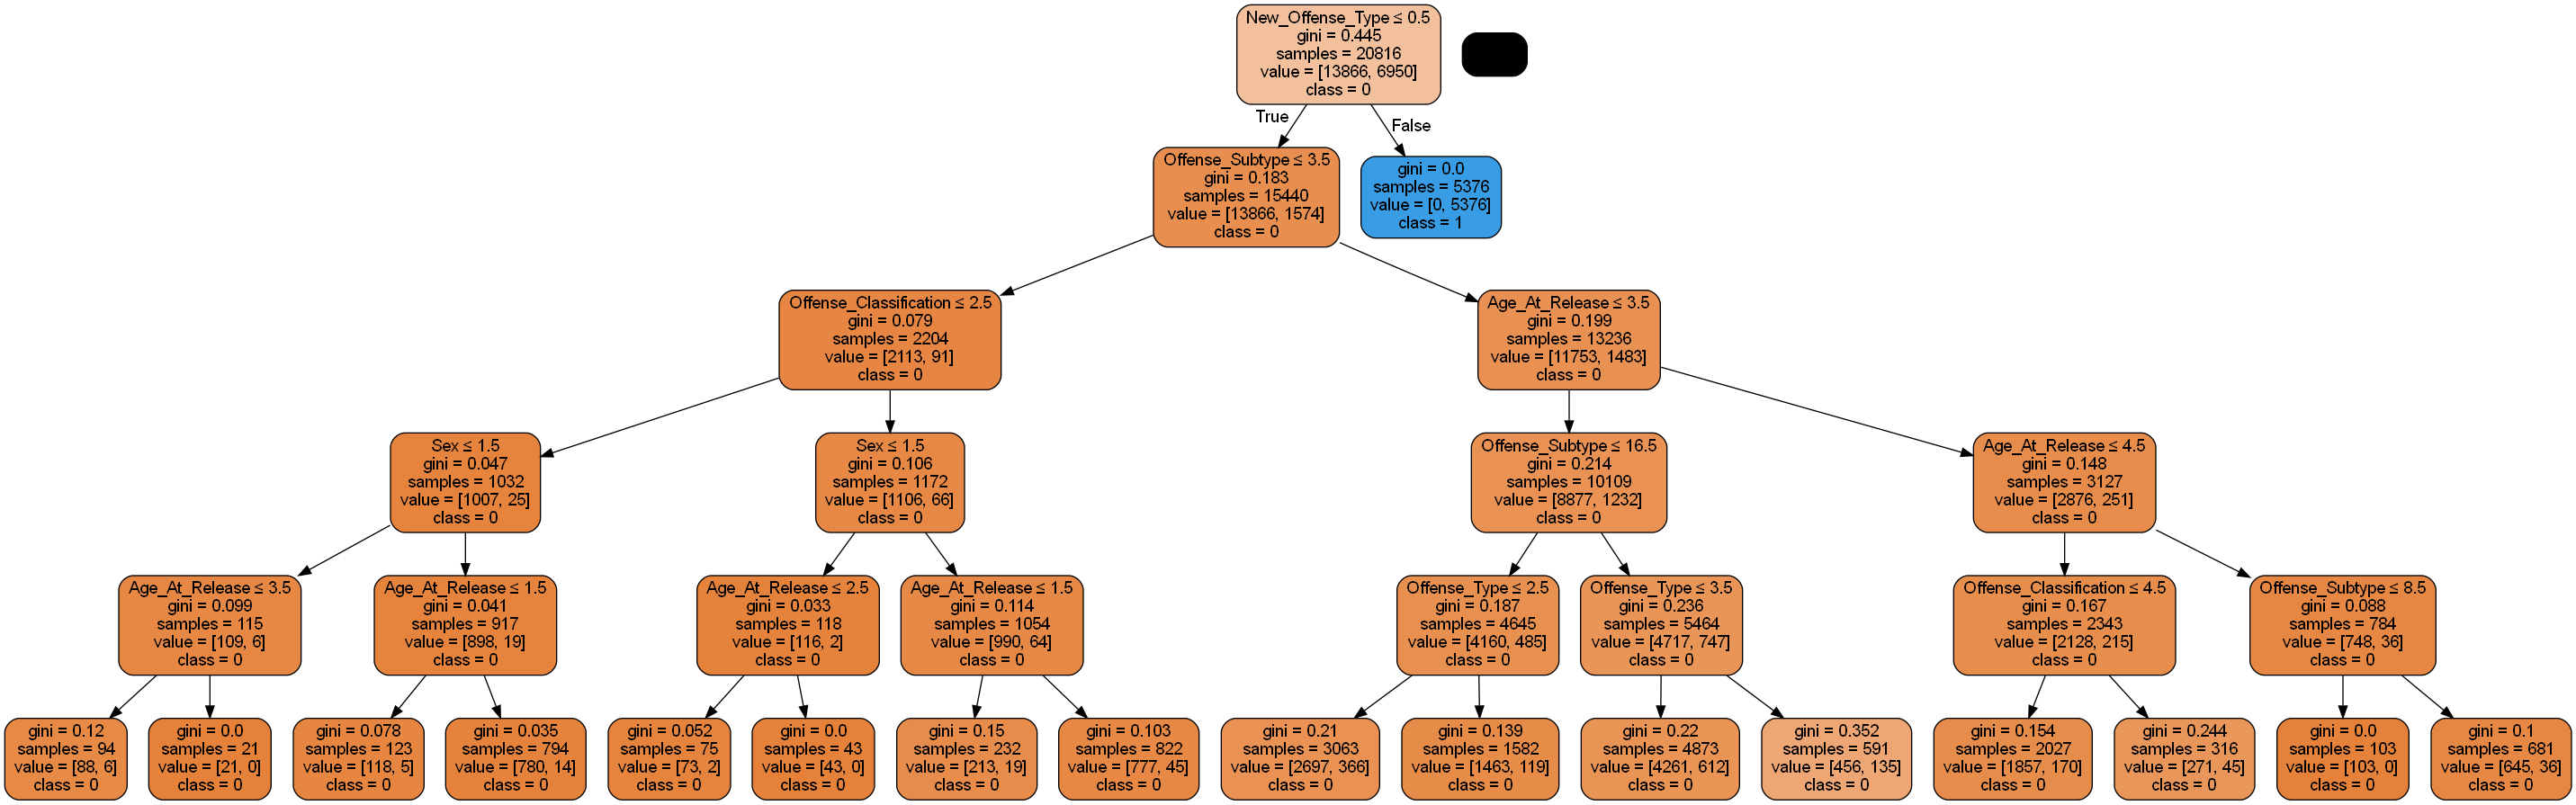

In [1849]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_2, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model2.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [1850]:
model2 = DecisionTreeClassifier(criterion="gini", splitter='best', max_depth=4)

model2 = model2.fit(x_train2,y_train2)

y_pred = model2.predict(x_test2)

print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.925249807840123


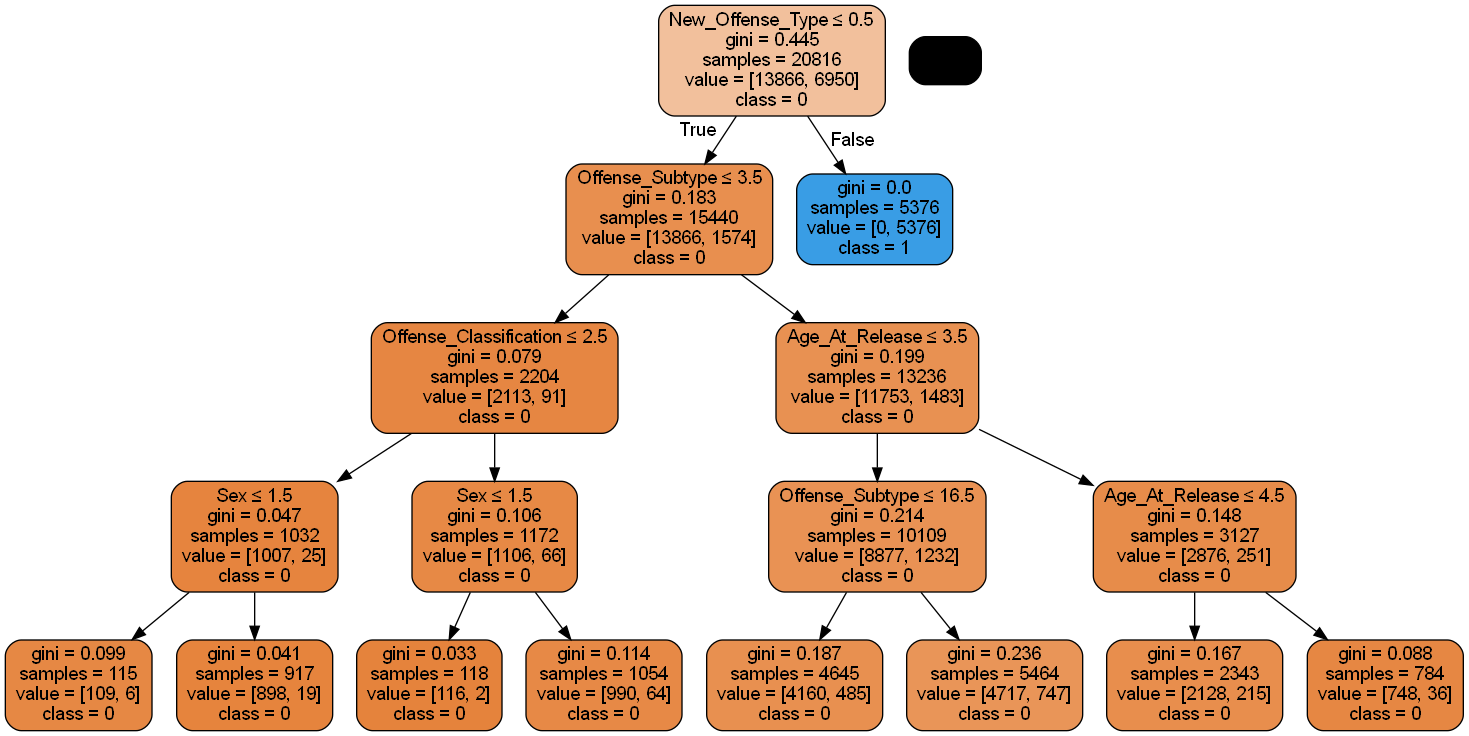

In [1851]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_2, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model2_2.png')
Image(graph.create_png())

## Testing

Root Mean Square Error

In [1852]:
# a low rmse value means that model can relatively predict data accurately 
from sklearn.metrics import mean_squared_error
# print rmse
mse2 = mean_squared_error(y_test2, y_pred2)
mse2

0.07475019215987702

R-Squared

In [1853]:
# R2 scores values
from sklearn.metrics import r2_score
print("R2 Score Value: {:.2f}".format(r2_score(y_test2, y_pred2)))

R2 Score Value: 0.66


Overfitting vs Underfitting

In [1854]:
print("Training set score: {:.4f}".format(model2.score(x_train2, y_train2)))

Training set score: 0.9244


In [1855]:
print("Training set score: {:.4f}".format(model2.score(x_test2, y_test2)))

Training set score: 0.9252


Metrics Analysis

In [1856]:
# getting predicted classes for test
y_pred2 = model2.predict(x_test2)

In [1857]:
# calculate confusion matrix
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
conf_matrix2

array([[3473,    0],
       [ 389, 1342]], dtype=int64)

In [1858]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test2, y_pred2)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      3473
         1.0       1.00      0.78      0.87      1731

    accuracy                           0.93      5204
   macro avg       0.95      0.89      0.91      5204
weighted avg       0.93      0.93      0.92      5204

